In [10]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms"
# by
# Chanchal Chatterjee and Vwani P. Roychowdhury
# August 2021
#
# Experiments for Chapter 2 - Anomaly Detection Example
#
# Author: Chanchal Chatterjee
#

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#import tensorflow as tf


In [26]:
# get data here: https://sites.google.com/view/uspdsrepository
dataset   = pd.read_csv("gs://chanchal_book_bucket1/elec.csv")
dataset = dataset.dropna()
X = np.array(dataset["F6"])
print(dataset.shape)
print(dataset.head())


(45312, 9)
    F1  F2        F3        F4        F5        F6        F7        F8  Class
0  0.0   2  0.000000  0.056443  0.439155  0.003467  0.422915  0.414912      1
1  0.0   2  0.021277  0.051699  0.415055  0.003467  0.422915  0.414912      1
2  0.0   2  0.042553  0.051489  0.385004  0.003467  0.422915  0.414912      1
3  0.0   2  0.063830  0.045485  0.314639  0.003467  0.422915  0.414912      1
4  0.0   2  0.085106  0.042482  0.251116  0.003467  0.422915  0.414912      0


45312

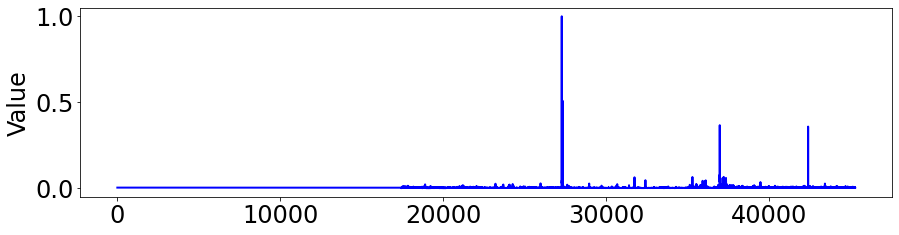

In [27]:
plt.figure(figsize=(32, 16))
plt.rcParams.update({'font.size': 24})
plt.subplot(4, 2, 1)
plt.ylabel("Value")
plt.plot(X, lw=2, color='b')
plt.show()

In [34]:
# Compute Correlation matrix and eigen vectors of the generated data
from numpy import linalg as la
MeanX = np.mean(X)
NMeanX = MeanX / la.norm(MeanX)
MedianX = np.median(X)
print("MeanX=\n", MeanX)
print("NMeanX=\n", NMeanX)
print("MedianX=\n", MedianX)

MeanX=
 0.003467033898305085
NMeanX=
 1.0
MedianX=
 0.003467


In [53]:
# Adaptive algorithm
from numpy import linalg as la

m  = 0
md = 0
nSamples = X.shape[0]

err1 = np.zeros(shape=(nSamples))
err2 = np.zeros(shape=(nSamples))
anam = np.zeros(shape=(nSamples))
mks  = np.zeros(shape=(nSamples))
mdks = np.zeros(shape=(nSamples))

for iter in range(nSamples):
    x = X[iter]
    #Eq. 2.2
    m  = m  + (1.0/(1 + iter)) * (x - m)
    mks[iter] = m
    #Eq.2.20
    md = md + (3.0/(1 + iter)) * np.sign(x - md)
    mdks[iter] = md

    err1[iter] = la.norm(m - MeanX)
    err2[iter] = la.norm(md - MedianX)
    if (x-md > 0.2):
        anam[iter] = 1


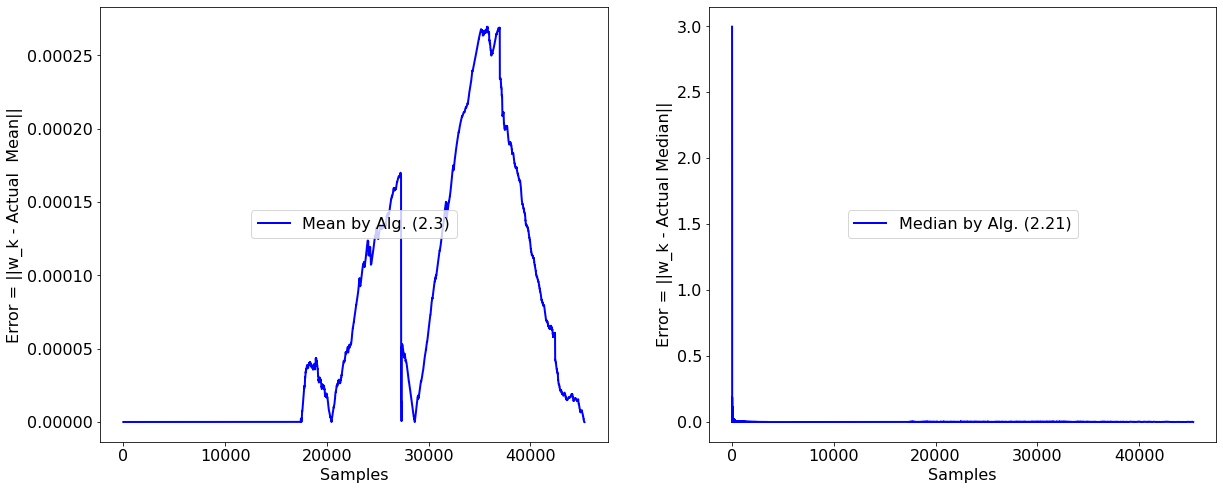

In [41]:
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 16})

plt.subplot(1, 2, 1)
plt.plot(err1, lw=2, color='b', label="Mean by Alg. (2.3)")
plt.ylabel('Error = ||w_k - Actual  Mean||')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.subplot(1, 2, 2)
plt.plot(err2, lw=2, color='b', label="Median by Alg. (2.21)")
plt.ylabel('Error = ||w_k - Actual Median||')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.show()

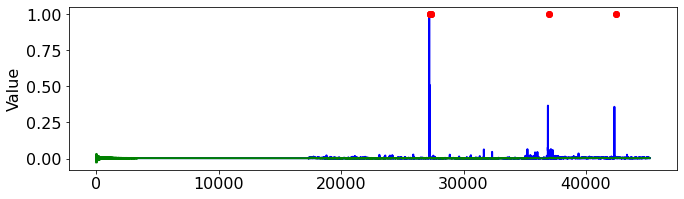

In [69]:
plt.figure(figsize=(24, 3))
plt.rcParams.update({'font.size': 16})
plt.subplot(1, 2, 1)
plt.ylabel("Value")
plt.plot(X[100:], lw=2, color='b')
plt.plot(mdks[100:], lw=2, color='g')
for i in range(100,anam.shape[0]):
    if (anam[i] > 0):
        plt.plot(i, anam[i], 'o', color='r')
plt.show()